In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
df= pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


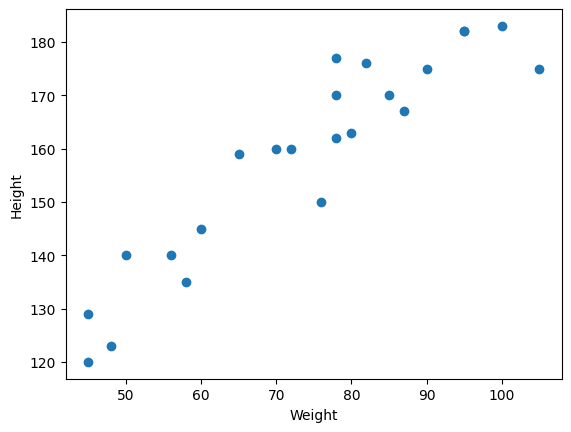

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
##divide the dataset into independent and dependent features

x=df[['Weight']] #independent feature
y=df[['Height']] #dependent feature


In [7]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [8]:
#standardized the dataset only independent feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

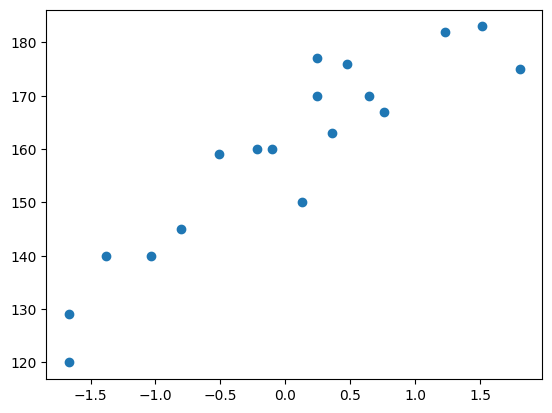

In [9]:
plt.scatter(x_train,y_train)

In [10]:
##train the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.coef_

array([[16.30665268]])

In [12]:
lr.intercept_

array([159.22222222])

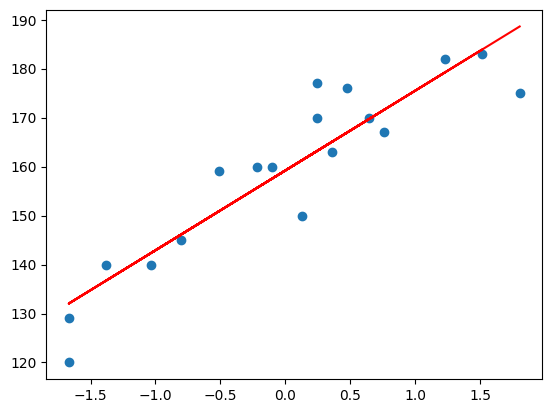

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='red')

In [14]:
##prediction of train data (intercept + slope * x)
y_pred_test=lr.predict(x_test)



In [15]:
y_pred_test,y_test

(array([[163.15136502],
        [144.29147959],
        [174.46729628],
        [134.86153687],
        [179.18226764]]),
     Height
 5      162
 1      135
 7      175
 2      123
 11     182)

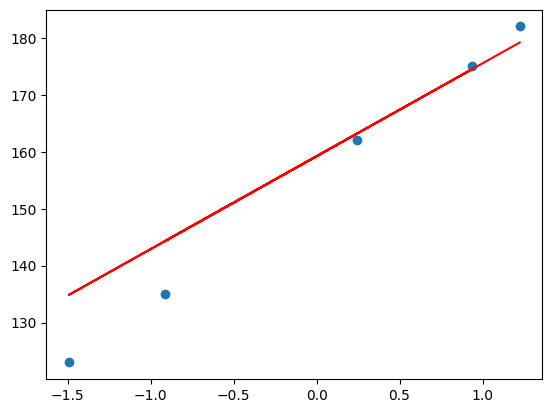

In [16]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,color='red')

In [17]:
## performance metrics mse.mae,rmse r2 and adjusted r2

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))


Mean Absolute Error: 5.130963513443783
Mean Squared Error: 47.31533605904549
Root mean squared error: 6.8786143996480495


In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print('R2 Score:',score)

R2 Score: 0.9090509456038646


In [19]:
##adjusted r2
n=len(x_test)
p=x_test.shape[1]
adjusted_r2=1-(1-score)*(n-1)/(n-p-1)
print(adjusted_r2)

0.8787345941384861


In [20]:
# new data point weight 80
new_data=[[80]]
new_data=sc.transform(new_data)
new_data


c:\Users\gurah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.35661098]])

In [21]:
print('the height for weight 80 is',lr.predict([new_data[0]]))

the height for weight 80 is [[165.03735356]]


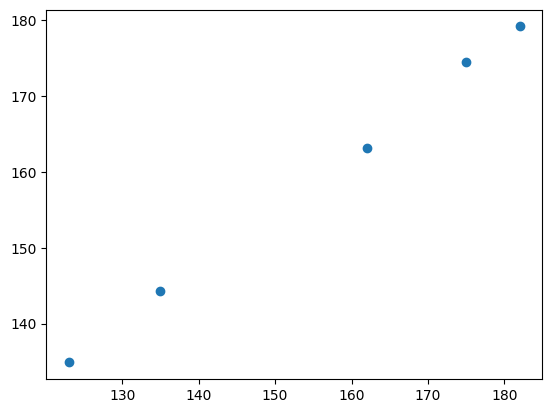

In [22]:
## assumption of linear regression
#plot a scatter plot
plt.scatter(y_test,y_pred_test)


In [23]:
#residual 

residual=y_test-y_pred_test
residual

,Height
5,-1.151365
1,-9.291480
7,0.532704
2,-11.861537
11,2.817732


C:\Users\gurah\AppData\Local\Temp\ipykernel_20808\297800058.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: ylabel='Density'>

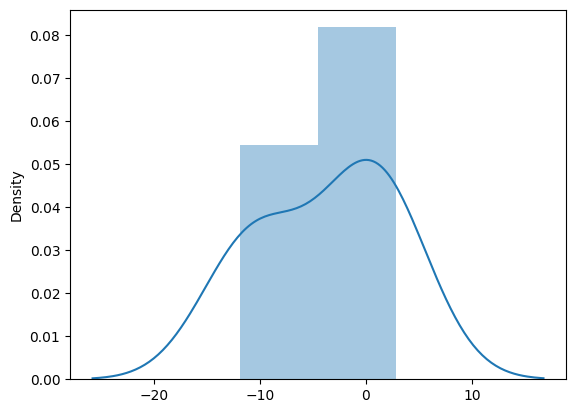

In [24]:
#plot residual
import seaborn as sns
sns.distplot(residual,kde=True)

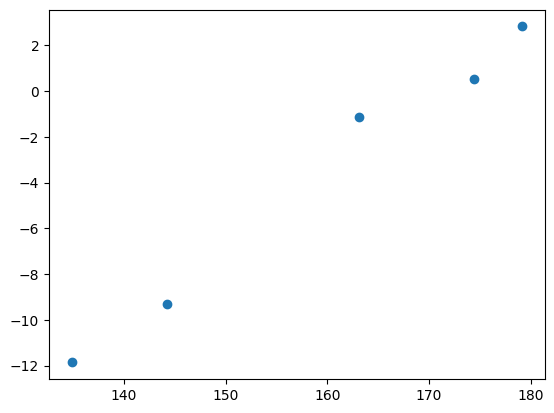

In [25]:
# scatter plot wiht respect to prediction
#uniform distribution
plt.scatter(y_pred_test,residual)